In [1]:
import pandas as pd

In [2]:
df=pd.read_excel("Dataset.xlsx")
df

,Supernova,Redshift,Distance Modulus,Distance Modulus Error,Unnamed: 4
0,1993ah,0.028488,35.346583,0.223906,0.128419
1,1993ag,0.050043,36.682368,0.166829,0.128419
2,1993o,0.052926,36.817691,0.155756,0.128419
3,1993b,0.070086,37.446737,0.158467,0.128419
4,1992bs,0.062668,37.483409,0.156099,0.128419
...,...,...,...,...,...
575,D-000,1.017000,44.293971,0.171046,0.000015
576,D-006,1.315000,44.971358,0.187509,0.551672
577,P-009,0.821000,43.640939,0.194014,0.551672
578,R-012,1.215000,45.246521,0.560317,0.000148


In [3]:
z=df["Redshift"]
z

0      0.028488
1      0.050043
2      0.052926
3      0.070086
4      0.062668
         ...   
575    1.017000
576    1.315000
577    0.821000
578    1.215000
579    0.623000
Name: Redshift, Length: 580, dtype: float64

In [4]:
Distance_modulus=df["Distance Modulus"]
Distance_modulus

0      35.346583
1      36.682368
2      36.817691
3      37.446737
4      37.483409
         ...    
575    44.293971
576    44.971358
577    43.640939
578    45.246521
579    42.514524
Name: Distance Modulus, Length: 580, dtype: float64

In [5]:
Modulo=10**((Distance_modulus-25)/5)
Modulo

0        117.305042
1        217.006920
2        230.960787
3        308.565458
4        313.820905
           ...     
575     7224.273081
576     9868.963776
577     5347.955161
578    11202.222383
579     3183.499599
Name: Distance Modulus, Length: 580, dtype: float64

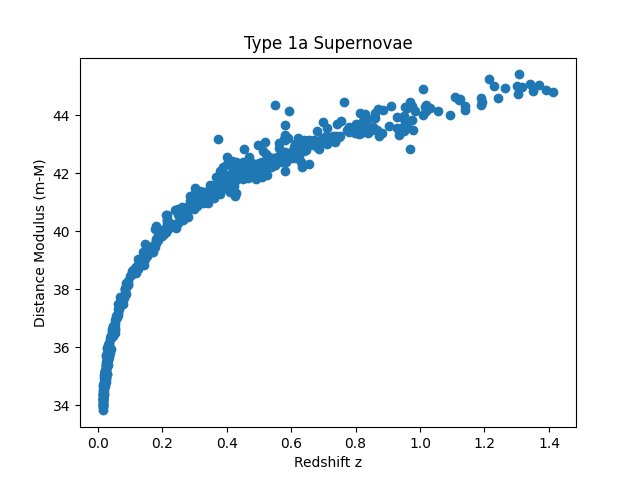

In [6]:
import matplotlib.pyplot as plt
#agregamos un control interactivo a la gráfica
%matplotlib widget
from matplotlib.colors import LogNorm

import numpy as np 
from scipy.integrate import quad



plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus (m-M)")
plt.scatter(z,Distance_modulus)






plt.show()

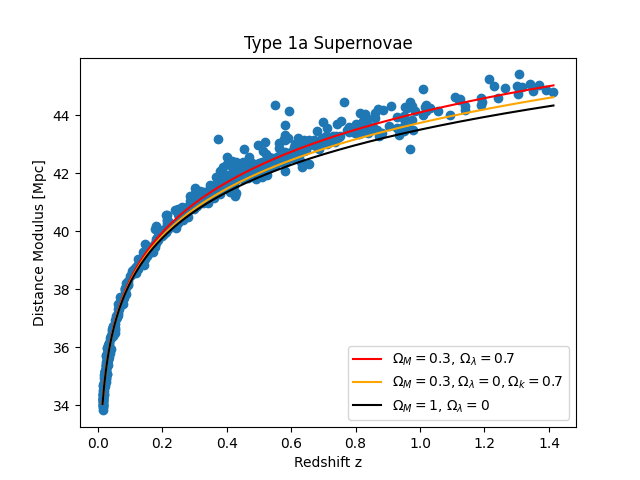

In [7]:
import matplotlib.pyplot as plt
#agregamos control interactivo a la gráfica
%matplotlib widget
import numpy as np 
from scipy.integrate import quad



plt.figure()
from matplotlib.colors import LogNorm
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Distance Modulus [Mpc]")
plt.scatter(z, Distance_modulus)

def distance_modulus_teórica(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda +(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    result= ((300000)/ H0)*(1+z) * integral
    return 5*np.log10(result)+25

#El factor de 25 proviene de las unidades en pc's. Considerando:m-M=5log(d/10pc)+5, se pasa a Mpc y sale el 25
#No tiene que ver con el fenómeno de extinsión.


#Primera Curva
# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values= np.array([distance_modulus_teórica(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values])
plt.plot(Z_values, distance_modulus_values, label=r'$\Omega_M=0.3$, $\Omega_{\lambda}=0.7$', color='red')
plt.legend()


#Segunda Curva

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70 
omega_M_value = 0.3
omega_lambda_value2 =0

#Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values2 = np.array([distance_modulus_teórica(z, H0_value, omega_M_value, omega_lambda_value2) for z in Z_values])
plt.plot(Z_values, distance_modulus_values2, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0, \Omega_k=0.7$', color='orange')
plt.legend()


#Tercera Curva
# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  
omega_M_value3 = 1
omega_lambda_value2 =0

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data = np.array(z)  # Ejemplo de valores de z
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada
distance_modulus_values3 = np.array([distance_modulus_teórica(z, H0_value, omega_M_value3, omega_lambda_value2) for z in Z_values])
plt.plot(Z_values, distance_modulus_values3, label=r'$\Omega_M=1$, $\Omega_{\lambda}=0$', color='black')
plt.legend()


plt.show()

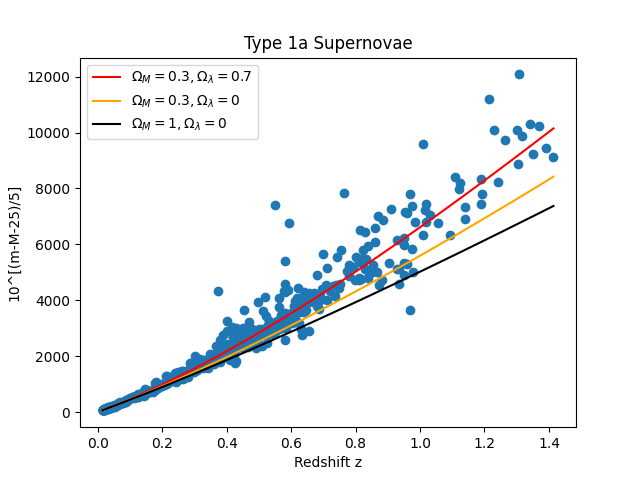

In [8]:
plt.figure()
from matplotlib.colors import LogNorm
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("10^[(m-M-25)/5]")
plt.scatter(z,Modulo)

def luminosity_distance(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda +(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    return ((300000)/ H0)*(1+z)*integral

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7

#Primera curva

# Ploteamos la función ajustada (luminosidad en función de z)
Z_data1 = np.array(z)  # Ejemplo de valores de z
Z_values1 = np.linspace(min(Z_data1), max(Z_data1), 580)  # Valores de z para graficar la función ajustada
luminosity_values1 = np.array([luminosity_distance(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values1])
plt.plot(Z_values1, luminosity_values1, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0.7$', color='red')
plt.legend()



#Segunda curva

# Valores constantes para H0, omega_M y omega_lambda

omega_M_value= 0.3
omega_lambda_value2 = 0

# Ploteando la función ajustada (luminosidad en función de z)
luminosity_values2 = np.array([luminosity_distance(z, H0_value, omega_M_value, omega_lambda_value2) for z in Z_values1])
plt.plot(Z_values1, luminosity_values2, label=r'$\Omega_M=0.3, \Omega_{\lambda}=0$', color='orange')
plt.legend()





#Tercera curva

# Valores constantes para H0, omega_M y omega_lambda

omega_M_value3= 1
omega_lambda_value2 = 0

# Ploteamos la función ajustada (luminosidad en función de z)
luminosity_values3 = np.array([luminosity_distance(z, H0_value, omega_M_value3, omega_lambda_value2) for z in Z_values1])
plt.plot(Z_values1, luminosity_values3, label=r'$\Omega_M=1, \Omega_{\lambda}=0$', color='black')
plt.legend()



plt.show()

### Teóricamente se tiene que 

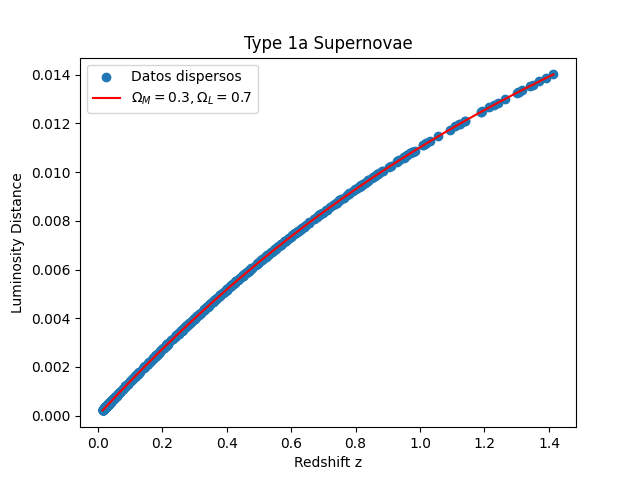

In [9]:
import numpy as np
from scipy.integrate import quad

def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1 / np.sqrt(omega_M * (1 + z)**3 + omega_lambda)
    integral, _ = quad(integrand, 0, z)
    return (1/ H0) * integral


# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7


Z_data = np.array(z)  # Ejemplo de valores de z
luminosity_distance_data = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_data])



#Ploteamos los datos y la función ajustada
plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Luminosity Distance")
plt.scatter(Z_data, luminosity_distance_data, label='Datos dispersos')

#Ploteamos la función ajustada (luminosidad en función de z)
Z_values = np.linspace(min(Z_data), max(Z_data), 580)  # Valores de z para graficar la función ajustada

'''Z_values = np.linspace(0, 1, 580)  # Valores de z para graficar la función ajustada '''

luminosity_values = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_values])
plt.plot(Z_values, luminosity_values, label=r'$\Omega_M=0.3, \Omega_L=0.7$', color='red')

plt.legend()
plt.show()


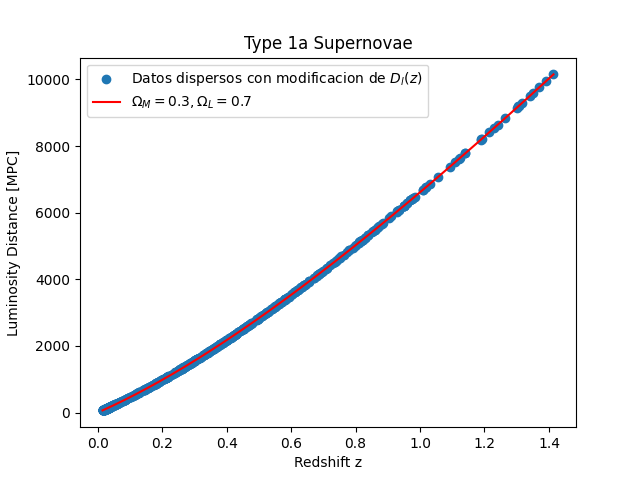

In [10]:
import numpy as np
from scipy.integrate import quad
'''
def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1 / np.sqrt(omega_M * (1 + z)**3 + omega_lambda)
    integral, _ = quad(integrand, 0, z)
    return (1/ H0) * integral

'''

def luminosity_distance2(z, H0, omega_M, omega_lambda):
    integrand = lambda z: 1/ np.sqrt(omega_M * (1 + z)**3 + omega_lambda+(1-omega_M-omega_lambda)*(1+z)**2)
    integral, _ = quad(integrand, 0, z)
    return ((300000)/ H0)*(1+z)* integral

# Valores constantes para H0, omega_M y omega_lambda
H0_value = 70  # Por ejemplo, asumimos un valor de H0
omega_M_value = 0.3
omega_lambda_value = 0.7


Z_data3 = np.array(z)  # Ejemplo de valores de z
luminosity_distance_data = np.array([luminosity_distance2(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_data])



# Ploteamos los datos y la función ajustada
plt.figure()
plt.title("Type 1a Supernovae")
plt.xlabel("Redshift z")
plt.ylabel("Luminosity Distance [MPC]")

# Ploteamos los datos dispersos
plt.scatter(Z_data, luminosity_distance_data, label=r'Datos dispersos con modificacion de $D_l(z)$')

# Ploteamos la función ajustada (luminosidad en función de z)
Z_values3 = np.linspace(min(Z_data3), max(Z_data3), 580)  # Valores de z para graficar la función ajustada
luminosity_values = np.array([luminosity_distance2(Z, H0_value, omega_M_value, omega_lambda_value) for Z in Z_values3])
plt.plot(Z_values3, luminosity_values, label=r'$\Omega_M=0.3, \Omega_L=0.7$', color='red')

plt.legend()
plt.show()


### Cálculo de la Chi cuadrada para $\Omega_M=0.3$; $\Omega_{\lambda}=0.7$ y $\Omega_k=0$

In [11]:
Error=df["Distance Modulus Error"]

In [12]:
Distance_modulus_error=np.array(Error)
Distance_modulus_error

array([0.22390593, 0.16682885, 0.15575591, 0.15846693, 0.15609943,
       0.18774568, 0.15563566, 0.19933718, 0.16717404, 0.16498125,
       0.17017495, 0.18469122, 0.16733348, 0.17551084, 0.15977086,
       0.19131227, 0.16230382, 0.17329544, 0.14291293, 0.14869411,
       0.08875066, 0.1024385 , 0.1070412 , 0.10849979, 0.17254762,
       0.18166271, 0.21523934, 0.17118699, 0.16029927, 0.18754476,
       0.16426869, 0.16788525, 0.20496507, 0.20946467, 0.17636469,
       0.23244938, 0.25089656, 0.2314796 , 0.21762859, 0.24063382,
       0.27165064, 0.22536249, 0.2346982 , 0.24838513, 0.22170026,
       0.30988981, 0.22242642, 0.24821601, 0.22436855, 0.2511775 ,
       0.16145286, 0.08609535, 0.08414412, 0.09910053, 0.11161425,
       0.15677749, 0.12944495, 0.0872168 , 0.20625667, 0.1836893 ,
       0.17231734, 0.21507123, 0.23901137, 0.22111537, 0.1717422 ,
       0.2155085 , 0.1802167 , 0.18996068, 0.2079597 , 0.19352392,
       0.17674739, 0.18012445, 0.24147486, 0.21156247, 0.17902

In [14]:
distance_modulus_values #Teórica

array([34.06553799, 34.39382322, 34.67989195, 34.93347369, 35.16127846,
       35.36812994, 35.55761231, 35.73246167, 35.89481409, 36.04636925,
       36.18850171, 36.32233891, 36.44881708, 36.56872216, 36.68272036,
       36.7913813 , 36.89519583, 36.9945899 , 37.08993556, 37.18155964,
       37.26975083, 37.35476539, 37.43683182, 37.51615473, 37.59291807,
       37.66728783, 37.73941428, 37.80943391, 37.87747106, 37.94363935,
       38.00804281, 38.07077702, 38.13192992, 38.19158265, 38.24981023,
       38.30668214, 38.36226288, 38.41661241, 38.46978659, 38.52183751,
       38.57281386, 38.62276122, 38.67172228, 38.71973712, 38.76684339,
       38.81307653, 38.85846992, 38.90305503, 38.9468616 , 38.98991773,
       39.03224999, 39.07388358, 39.11484236, 39.15514901, 39.19482503,
       39.23389089, 39.27236606, 39.31026907, 39.34761759, 39.38442848,
       39.42071782, 39.45650095, 39.49179258, 39.52660674, 39.56095687,
       39.59485585, 39.62831601, 39.66134917, 39.69396669, 39.72

In [15]:
Distance_modulus_values=np.array([Distance_modulus])
Distance_modulus_values #Observado

array([[35.34658339, 36.68236792, 36.81769125, 37.44673654, 37.48340935,
        38.22905705, 37.48816226, 34.65436995, 36.33645955, 36.64027218,
        35.90532197, 34.58521743, 38.4567456 , 35.08576569, 37.58811576,
        35.4806852 , 36.56697347, 35.55023776, 34.04402778, 33.9409484 ,
        35.59924572, 35.05817066, 34.96871038, 35.36726207, 36.7315974 ,
        35.10949506, 34.10166662, 35.96054064, 36.38201078, 34.85297336,
        39.04478851, 35.8210171 , 34.01742111, 34.22633717, 35.64970591,
        34.97378687, 34.18129629, 35.08554272, 36.13423313, 34.95261373,
        34.3437957 , 35.72876878, 35.16959909, 34.0027278 , 36.47643849,
        34.37877181, 35.09337833, 34.26067146, 35.97225783, 34.34383381,
        34.16350389, 36.95443541, 39.22925402, 36.33439501, 38.8220334 ,
        38.8360423 , 38.97918547, 37.68224045, 37.03263017, 35.92947288,
        36.36563513, 34.0169043 , 34.9470872 , 34.17401539, 35.9868706 ,
        34.2497348 , 35.62680976, 34.91154976, 33.8

In [16]:
distance_modulus_values1=np.array([distance_modulus_teórica(z, H0_value, 0.3, 0.7) for z in Z_data])
distance_modulus_values1

array([35.48037495, 36.73802707, 36.86415541, 37.50036547, 37.24610631,
       38.01072298, 37.7615104 , 34.36978969, 36.35728577, 36.5141102 ,
       36.03016191, 34.65379586, 38.33781748, 35.38936557, 37.64289327,
       35.31916224, 36.732581  , 35.63936566, 34.25430426, 34.12851568,
       35.63391692, 35.14869614, 35.09652178, 35.28114234, 36.68827119,
       35.12959058, 34.08971016, 35.98323207, 36.68229269, 34.90665137,
       38.82573572, 36.00063435, 34.25098782, 34.30540543, 35.40213302,
       34.88779271, 34.26829542, 35.02669983, 36.02875572, 34.6158108 ,
       34.41754157, 35.70544236, 35.05770784, 34.30711345, 36.8973062 ,
       34.33944886, 35.43135452, 34.36288368, 35.59177669, 34.28281546,
       34.06553799, 36.92609786, 39.3622817 , 36.19633949, 38.82007053,
       39.17229513, 38.92738863, 37.75634776, 37.08249047, 35.6607432 ,
       36.2690701 , 34.09462879, 34.9484365 , 34.20732644, 36.0129839 ,
       34.3790917 , 35.68220611, 34.91866919, 34.20732644, 35.18

In [17]:
#El número de datos totales son 580
chi_squared1=np.sum((Distance_modulus_values-distance_modulus_values1)**2/Distance_modulus_error**2)
chi_squared1

564.5332644764144

### Cáculo de la $\chi^2$ para  $\Omega_M=0.3$, $\Omega_{\lambda}=0$ y $\Omega_k=0.7$ 

In [18]:
distance_modulus_values2=np.array([distance_modulus_teórica(z, H0_value, 0.3, 0) for z in Z_data])
distance_modulus_values2

array([35.45924942, 36.70159605, 36.82572024, 37.45020625, 37.20097249,
       37.9489589 , 37.70567754, 34.35689044, 36.32633446, 36.48100167,
       36.00329475, 34.63915046, 38.26745079, 35.36906988, 37.5897041 ,
       35.29948531, 36.69623431, 35.6167122 , 34.24205564, 34.1169394 ,
       35.61131752, 35.13044733, 35.07868982, 35.26179292, 36.65260399,
       35.11149549, 34.07833394, 35.95690749, 36.64671626, 34.8902604 ,
       38.74068298, 35.9741098 , 34.23875741, 34.29287294, 35.38172283,
       34.87153859, 34.25596971, 35.00941141, 36.00190497, 34.60141158,
       34.40436357, 35.68212345, 35.04018003, 34.29457137, 36.85832776,
       34.32672373, 35.41067992, 34.35002425, 35.56959127, 34.27040924,
       34.05428467, 36.8866419 , 39.25832894, 36.16746528, 38.73520164,
       39.0753753 , 38.83898194, 37.70063232, 37.04034614, 35.63787645,
       36.23927395, 34.0832274 , 34.93173838, 34.19533325, 35.98631656,
       34.3661386 , 35.6591233 , 34.90219045, 34.19533325, 35.16

In [19]:
chi_squared2=np.sum((Distance_modulus_values-distance_modulus_values2)**2/Distance_modulus_error**2)
chi_squared2

1211.7402132076597

### Cálculo de la $\chi^2$ cuadrada para $\Omega_M=1$, $\Omega_{\lambda}=0$ y $\Omega_k=0$ 

In [20]:
distance_modulus_values3=np.array([distance_modulus_teórica(z, H0_value, 1, 0) for z in Z_data])

In [21]:
chi_squared3=np.sum((Distance_modulus_values-distance_modulus_values3)**2/Distance_modulus_error**2)
chi_squared3

2123.0905284576766

In [22]:
distance_modulus_values=np.array([distance_modulus_teórica(z, H0_value, omega_M_value, omega_lambda_value) for z in Z_data])

In [23]:
def calcular_chi_cuadrado(Distance_modulus_values, distance_modulus_values2, Distance_modulus_error):
    diferencia = Distance_modulus_values - distance_modulus_values2
    chi_cuadrado = np.sum(diferencia**2 / Distance_modulus_error**2)
    
    return chi_cuadrado


chi_cuadrado_resultante = calcular_chi_cuadrado(Distance_modulus_values, distance_modulus_values2, Distance_modulus_error)

chi_cuadrado_resultante

1211.7402132076597

# Función $\chi^2$ 

In [24]:
def mu_teorica(omega_M, omega_lambda):
    distance_modulus_values=np.array([distance_modulus_teórica(z,H0_value,omega_M,omega_lambda) for z in Z_data])
    return distance_modulus_values

mu_teorica(0.3,0.7)
    

array([35.48037495, 36.73802707, 36.86415541, 37.50036547, 37.24610631,
       38.01072298, 37.7615104 , 34.36978969, 36.35728577, 36.5141102 ,
       36.03016191, 34.65379586, 38.33781748, 35.38936557, 37.64289327,
       35.31916224, 36.732581  , 35.63936566, 34.25430426, 34.12851568,
       35.63391692, 35.14869614, 35.09652178, 35.28114234, 36.68827119,
       35.12959058, 34.08971016, 35.98323207, 36.68229269, 34.90665137,
       38.82573572, 36.00063435, 34.25098782, 34.30540543, 35.40213302,
       34.88779271, 34.26829542, 35.02669983, 36.02875572, 34.6158108 ,
       34.41754157, 35.70544236, 35.05770784, 34.30711345, 36.8973062 ,
       34.33944886, 35.43135452, 34.36288368, 35.59177669, 34.28281546,
       34.06553799, 36.92609786, 39.3622817 , 36.19633949, 38.82007053,
       39.17229513, 38.92738863, 37.75634776, 37.08249047, 35.6607432 ,
       36.2690701 , 34.09462879, 34.9484365 , 34.20732644, 36.0129839 ,
       34.3790917 , 35.68220611, 34.91866919, 34.20732644, 35.18

In [25]:
def chi_cuadrado(omega_M,omega_lambda):
    factor=(Distance_modulus_values-mu_teorica(omega_M,omega_lambda))**2/Distance_modulus_error**2
    resultado=np.sum(factor)
    return resultado

In [26]:
chi_cuadrado(0.3,0.7)

564.5332644764144

In [27]:
chi_cuadrado(0.3,0)

1211.7402132076597

In [28]:
chi_cuadrado(1,0)

2123.0905284576766

### PRUEBA METRÓPOLIS-HASTINGS

In [29]:
pip install emcee

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install corner

Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tqdm


     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     -------------- ------------------------- 20.5/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 393.8 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 393.8 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 262.6 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 202.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/78.3 kB ? eta -:--:--
   ----- ------------------

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [51:38<00:00,  3.10s/it]


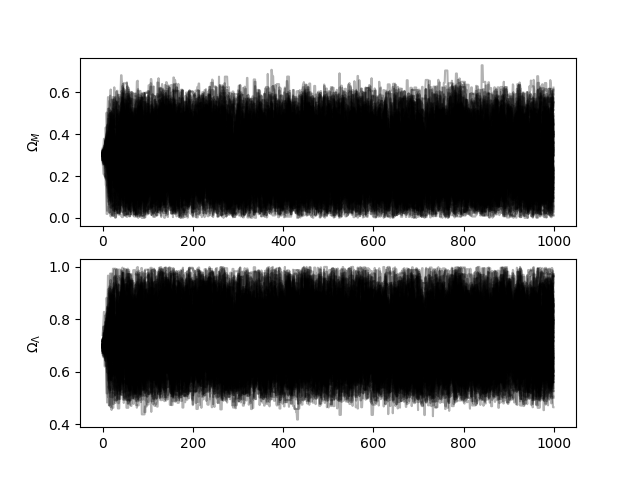

Median values:
[0.28731443 0.72741236]
1-sigma uncertainties:
[0.1417559  0.11650584]


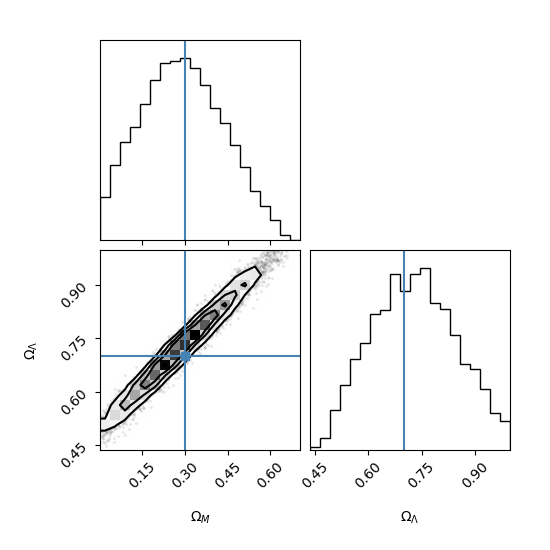

In [33]:
import emcee
import corner

# Datos observacionales
z_obs = np.array(z)
Distance_modulus_obs = np.array(Distance_modulus)
Distance_modulus_error = np.array(Distance_modulus_error)

# Definamos la función likelihood
def ln_likelihood(parameters, z, distance_modulus_obs, distance_modulus_error):
    omega_M, omega_lambda = parameters
    model = np.array([distance_modulus_teórica(zi, H0_value, omega_M, omega_lambda) for zi in z])
    residuals = distance_modulus_obs - model
    chi_square = np.sum(residuals**2 / distance_modulus_error**2)
    return -0.5 * chi_square

# Definamos el prior (uniforme en este caso)
def ln_prior(parameters):
    omega_M, omega_lambda = parameters
    if 0.0 < omega_M < 1.0 and 0.0 < omega_lambda < 1.0:
        return 0.0
    return -np.inf

# Definamos el posterior
def ln_posterior(parameters, z, distance_modulus_obs, distance_modulus_error):
    prior = ln_prior(parameters)
    if not np.isfinite(prior):
        return -np.inf
    likelihood = ln_likelihood(parameters, z, distance_modulus_obs, distance_modulus_error)
    return prior + likelihood

# Configuración del MCMC
nwalkers = 100
ndim = 2
nsteps = 1000

# Establecer condiciones iniciales para los caminantes
initial_guess = np.array([0.3, 0.7])
initial_pos = initial_guess + 1e-2 * np.random.randn(nwalkers, ndim)

# Configurar el sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(z_obs, Distance_modulus_obs, Distance_modulus_error))

# Ejecutar el MCMC
sampler.run_mcmc(initial_pos, nsteps, progress=True)

# Obtener las cadenas de Markov resultantes
samples = sampler.get_chain()

# Graficar las cadenas de Markov
plt.figure()
for i in range(ndim):
    plt.subplot(2, 1, i + 1)
    plt.plot(samples[:, :, i], "k", alpha=0.3)
    plt.ylabel(r"$\Omega_{" + ['M', '\Lambda'][i] + "}$")

plt.show()

# Obtener los resultados
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print("Median values:")
print(np.median(flat_samples, axis=0))
print("1-sigma uncertainties:")
print(np.std(flat_samples, axis=0))

# Graficar el diagrama de esquina
labels = [r"$\Omega_M$", r"$\Omega_{\Lambda}$"]
corner.corner(flat_samples, labels=labels, truths=initial_guess)
plt.show()


In [43]:
import emcee #Sirve para hacer el código MCMC
import corner #Sirve para visualizar los datos en un diagrama de esquina

#Introducimos los datos observacionales
z_obs=np.array(z)
Distance_modulus_obs=np.array(Distance_modulus)
Distance_modulus_error=np.array(Error)


#Definimos la chi cuadrada

def chi_cuadrado(omega_M,omega_lambda):
    modelo=np.array([distance_modulus_teórica(zi, H0_value, omega_M, omega_lambda) for zi in z_obs])
    factor=(Distance_modulus_obs-modelo)**2/Distance_modulus_error**2
    resultado=np.sum(factor)
    return resultado


#Definimos la función Likelihood como sigue:

def log_likelihood(parametros,z,Distance_modulus_obs,Distance_modulus_error):
    omega_M, omega_lambda=parametros
    return -0.5*chi_cuadrado
    
    




In [44]:
def chi_cuadrado(omega_M,omega_lambda):
    modelo=np.array([distance_modulus_teórica(zi, H0_value, omega_M, omega_lambda) for zi in z_obs])
    factor=(Distance_modulus_obs-modelo)**2/Distance_modulus_error**2
    resultado=np.sum(factor)
    return resultado

In [45]:
chi_cuadrado(0.3,0.7)

564.5332644764144

In [36]:
initial_pos

array([[0.300739  , 0.70045238],
       [0.3010753 , 0.69260613],
       [0.28688386, 0.68389744],
       [0.29985927, 0.69992402],
       [0.28926918, 0.69708986],
       [0.2796895 , 0.68557877],
       [0.32353395, 0.70431517],
       [0.29236483, 0.70370557],
       [0.31707059, 0.70678168],
       [0.31373804, 0.70575963],
       [0.31522984, 0.71841573],
       [0.30726886, 0.70788278],
       [0.30929389, 0.71225432],
       [0.31460472, 0.72290323],
       [0.29990004, 0.69751068],
       [0.30792319, 0.68455217],
       [0.31217003, 0.68978824],
       [0.30257086, 0.70113169],
       [0.31828348, 0.68795751],
       [0.30990912, 0.69306155],
       [0.29561377, 0.69093192],
       [0.30210821, 0.69020595],
       [0.30507507, 0.71144933],
       [0.30030866, 0.69109993],
       [0.28767336, 0.69014694],
       [0.29948807, 0.69350564],
       [0.30713355, 0.7225216 ],
       [0.3002463 , 0.67823137],
       [0.29955682, 0.70148133],
       [0.30940291, 0.69901659],
       [0.

In [37]:
len(initial_pos)

100